In [19]:
from fdtdcallib import *

In [20]:
from matplotlib import pyplot as plt

In [21]:
import math

In [22]:
8.85*10e-13

8.849999999999999e-12

In [23]:
3e8/FREQUENCY/64

0.00046875

In [82]:
miu=4*math.pi*10e-8
# 真空磁导率
eps=8.85*10e-13
# 绝对介电常数
thegam=0
# 电导率
miy=1
# 导磁率
d=3e-5
# 空间步长m
dt=1/((3e9)*math.sqrt(3)*d)
# 时间步长
FREQUENCY=10.0e9
# 信号频率
omega = 2.0*math.pi*FREQUENCY

In [83]:
N=128
ex1=np.zeros([N,N,N])
ey1=np.zeros([N,N,N])
ez1=np.zeros([N,N,N])
ex2=np.zeros([N,N,N])
ey2=np.zeros([N,N,N])
ez2=np.zeros([N,N,N])
bx1=np.zeros([N,N,N])
by1=np.zeros([N,N,N])
bz1=np.zeros([N,N,N])
bx2=np.zeros([N,N,N])
by2=np.zeros([N,N,N])
bz2=np.zeros([N,N,N])

In [84]:
ca=np.ones([N,N,N])*1 #(((1-(thegam*dt)/(2*eps))/(1+(thegam*dt)/(2*eps))))
cb=np.ones([N,N,N])*(dt/(eps*d)) #((dt/(d*eps))/(1+thegam*dt/(2*eps)))
cp=np.ones([N,N,N])*1 #(((1-(miy*dt)/(2*miy*miu))/(1+(miy*dt)/(2*miy*miu))))
cq=np.ones([N,N,N])*(dt/(miu*d)) #((dt/(d*miu))/(1+miy*dt/(2*miu)))

In [85]:
fdtd=fdtdcallib()

In [86]:
# ca=np.ones([N,N,N])
# cb=np.ones([N,N,N])
# cp=np.ones([N,N,N])
# cq=np.ones([N,N,N])

In [87]:
fdtd.initarr(1)

'OK'

In [88]:
fdtd.initcal(ex1,ey1,ez1,bx1,by1,bz1,ex2,ey2,ez2,bx2,by2,bz2)

'OK'

In [89]:
fdtd.initc(ca,cb,cp,cq)

'OK'

In [90]:
for iii in range(0,20):
    ez1[32,32,12:24]=1*math.sin(2*omega*dt*iii)
#     ey1[int(N/2),int(N/2),int(N/2)]=0
#     ez1[int(N/2),int(N/2),int(N/2)]=0
    fdtd.callib(1)

In [ ]:
ex1[5,5,5]=0

In [ ]:
ex1[5,5,5]=1
ey1[int(N/2),int(N/2),int(N/2)]=0
ez1[int(N/2),int(N/2),int(N/2)]=0

In [62]:
fdtd.callib(20)

'OK'

In [ ]:
plt.figure()

In [ ]:
ez1[3,:,:]=1*math.sin(omega*dt*iii)

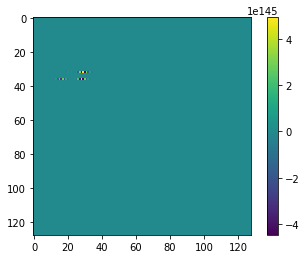

In [92]:
plt.imshow(ez1[32,:,:])
plt.colorbar()

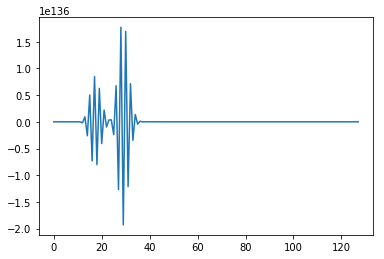

In [95]:
plt.plot(bx1[32,32,:])

In [128]:
E=ex1*ex1+ey1*ey1+ez1*ez1

In [ ]:
plt.imshow(E[:,10,:])
plt.colorbar()

In [ ]:
ex1[int(N/2),int(N/2),:]

In [ ]:
ex1[int(N/2),int(N/2),int(N/2)]

In [132]:
ex1[3,5,:]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [ ]:
ca